# Airline Customer Satisfaction Machine Learning 
#### Classification Project
- Imports
- Read
- Formate
- Drop not needed columns 
- Drop null values
- Create X, y
- Build feature list for numeric
- Split the data
- Feature Engineering , Dummy variables
- Baseline Model with numerical cols (Expr0)
- Expr1: With all the data (dummy included)
- Expr2: With scaling (standard scaler)
- Expr3: With grid search
- Expr4: With Decision Tree Classifier
- Expr5: With grid search
- Expr6: RandomForest Classifier
- Expr7: With Randomized Search
- Expr8: XGB Classifier
- Expr9: Voting and Stacking Classifier
- ROC curve
- Confusion Matrix
- Evaluation model


In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns                   
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                    

from sklearn.model_selection import train_test_split
#Model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import  VotingClassifier
from mlxtend.classifier import StackingClassifier 


from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix

import pickle


In [2]:
df=pd.read_csv("Invistico_Airline.csv")

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [6]:
df.shape

(129880, 23)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


### cheking for null value

In [8]:
df.isnull().values.any()

True

In [9]:
def draw_missing_data_table(data):
    Total = data.isnull().sum().sort_values(ascending=False)    
    missing_data = pd.concat([Total], axis=0)
    return missing_data

In [10]:
draw_missing_data_table(df)

Arrival Delay in Minutes             393
Inflight entertainment                 0
Departure Delay in Minutes             0
Online boarding                        0
Cleanliness                            0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Ease of Online booking                 0
Online support                         0
satisfaction                           0
Gender                                 0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Inflight wifi service                  0
dtype: int64

In [11]:
# droping the columns as these columns are pretty much irrevelent
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [12]:
# droping the columns as these columns are pretty much irrevelent
df.drop(['Departure Delay in Minutes'], axis=1, inplace=True)

In [13]:
#we drop 20000
df.drop(df.index[100000:], inplace = True)

In [14]:
df['satisfaction'].value_counts()

dissatisfied    57236
satisfied       42764
Name: satisfaction, dtype: int64

<AxesSubplot:>

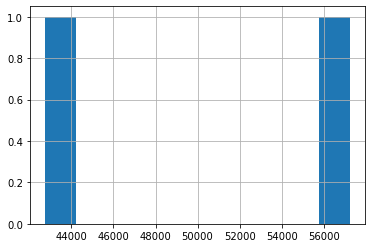

In [15]:
df['satisfaction'].value_counts().hist()

In [16]:
df.shape

(100000, 21)

In [17]:
df['satisfaction'].value_counts()

dissatisfied    57236
satisfied       42764
Name: satisfaction, dtype: int64

In [18]:
df['satisfaction'] = df['satisfaction'].replace('satisfied',0).replace('dissatisfied',1)

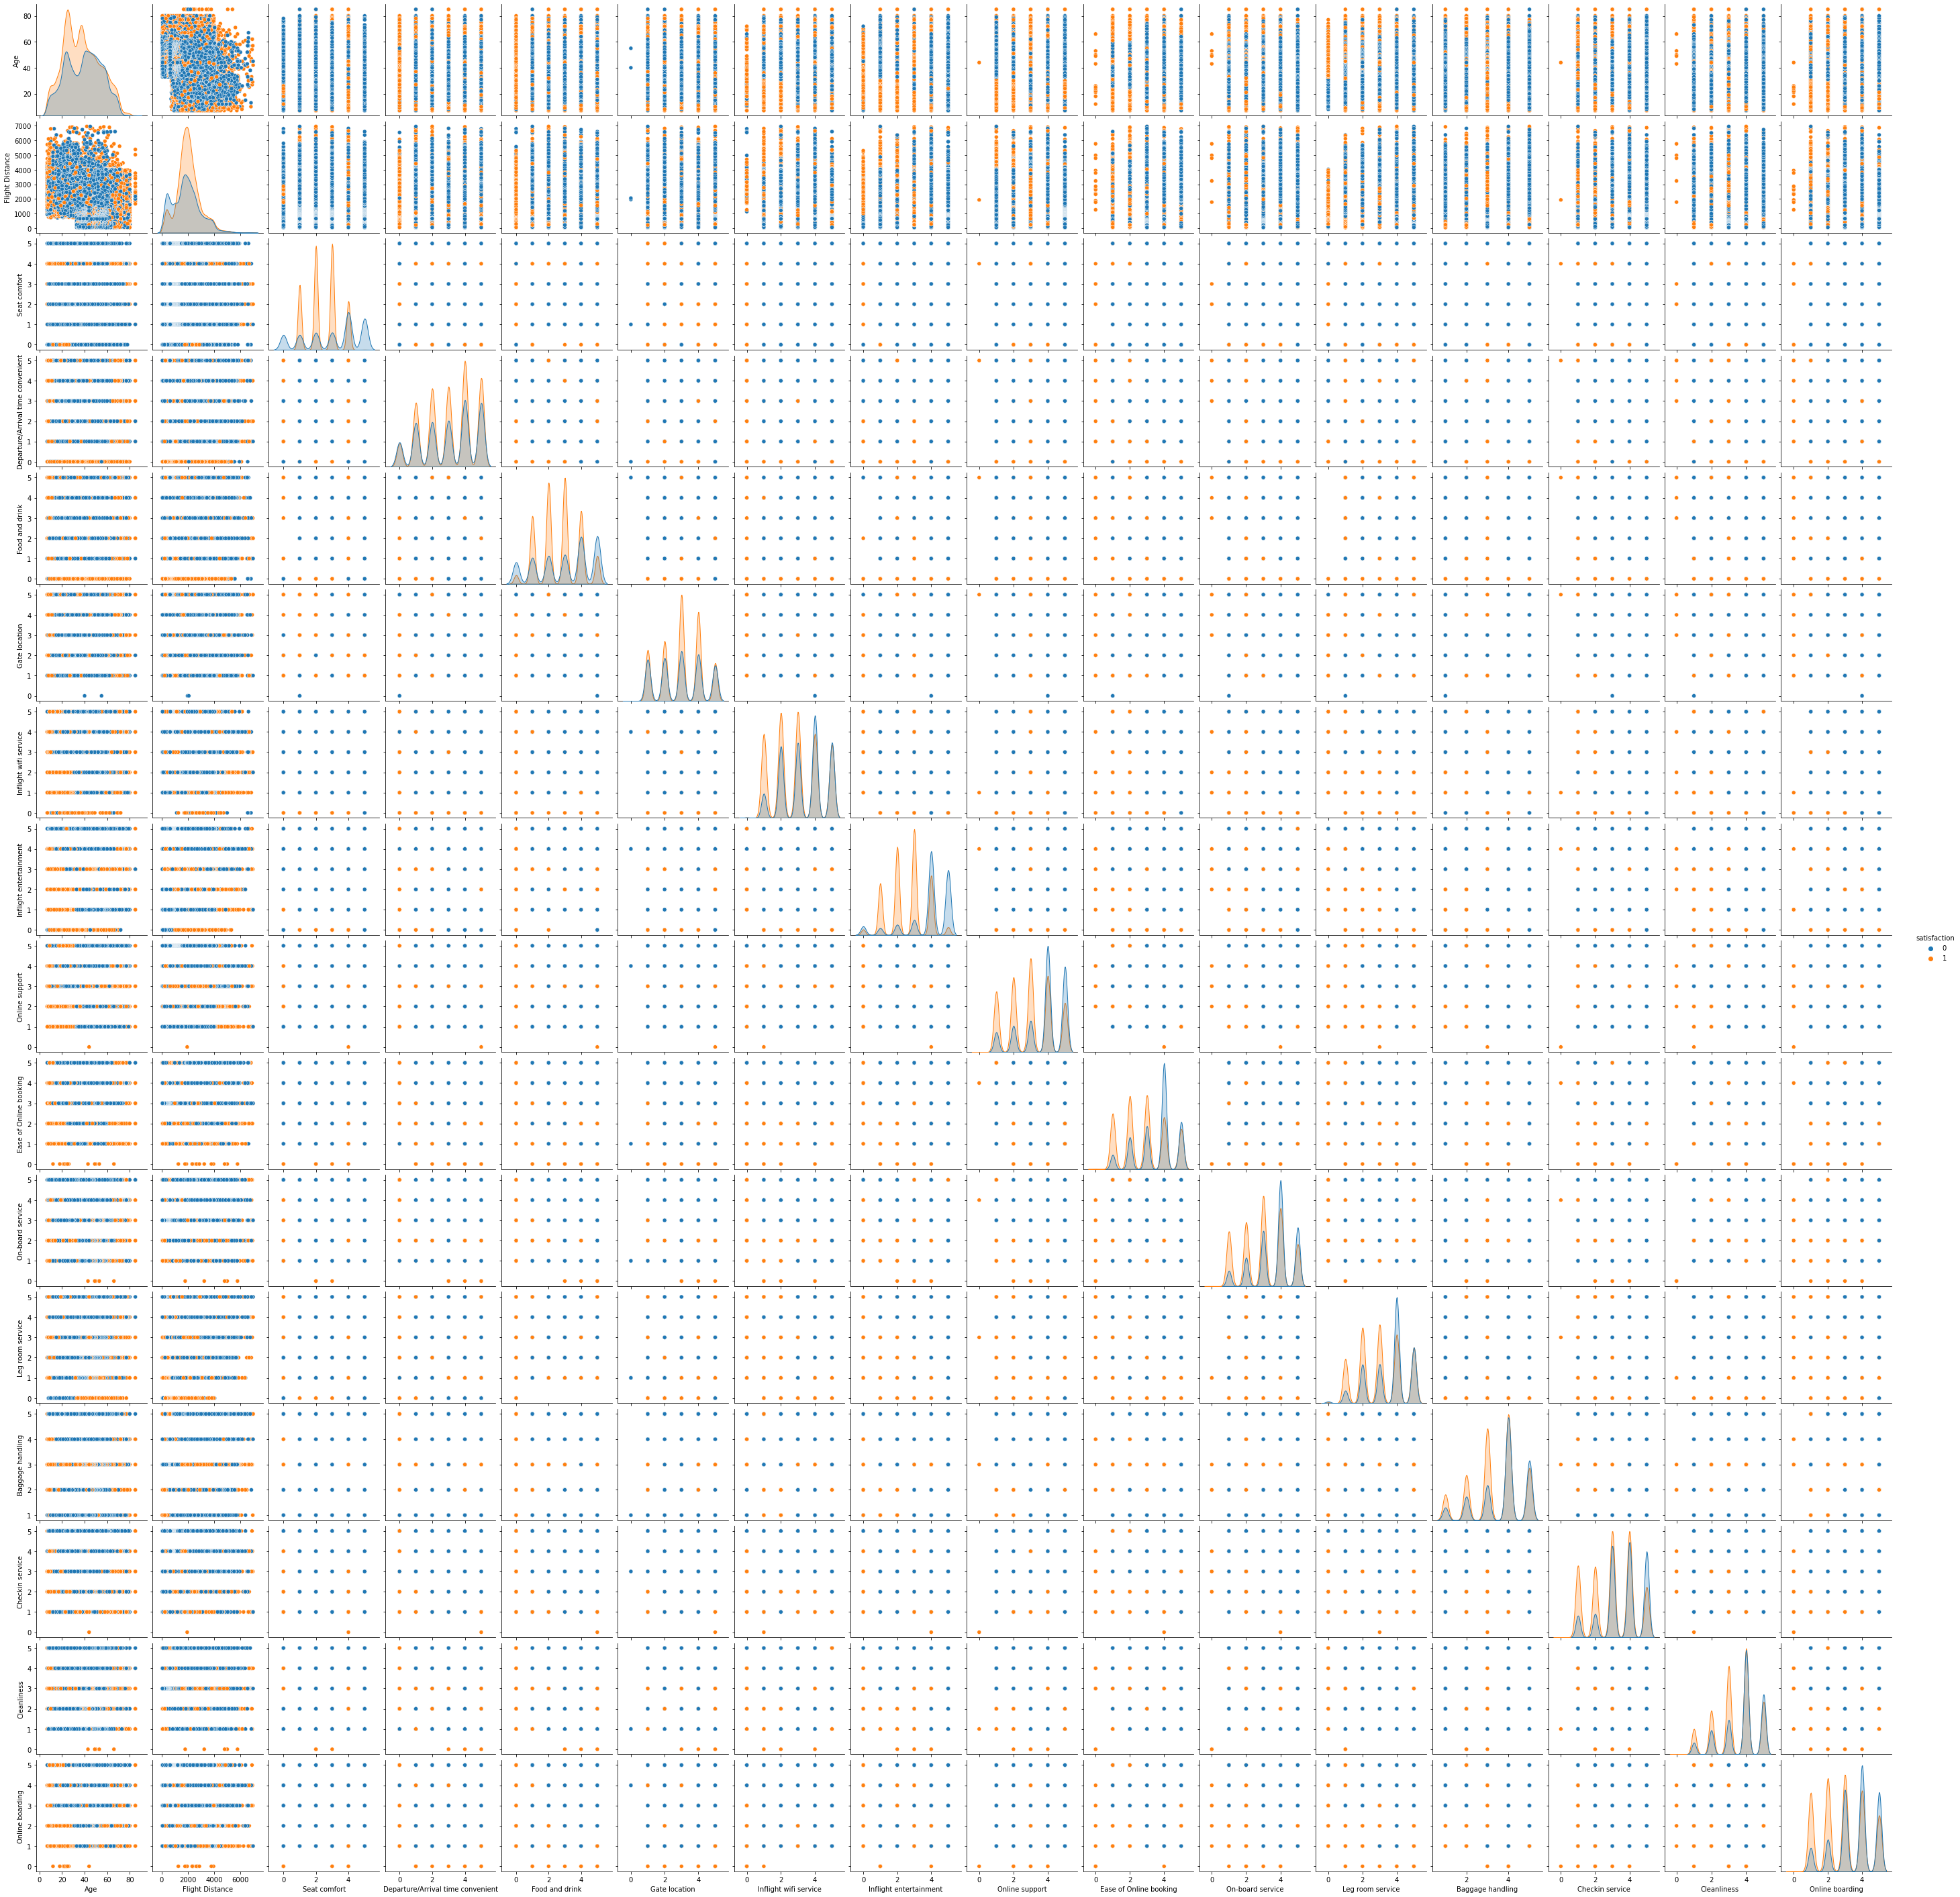

In [144]:
sns.pairplot(df,hue="satisfaction")

In [19]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,4,2,3,3,0,3,5,3,2
1,0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,0,2,2,3,4,4,4,2,3,2
2,0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,0,2,2,3,3,4,4,4,2
3,0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,4,3,1,1,0,1,4,1,3
4,0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,Male,Loyal Customer,44,Business travel,Business,2705,1,1,1,...,2,4,4,4,4,4,4,5,4,5
99996,0,Female,Loyal Customer,40,Business travel,Business,2993,2,2,2,...,4,5,4,4,4,4,4,5,4,4
99997,0,Female,Loyal Customer,31,Business travel,Business,5097,5,5,5,...,4,4,4,4,4,3,4,3,5,4
99998,0,Female,Loyal Customer,25,Business travel,Business,1998,4,4,4,...,4,4,4,4,5,5,5,5,4,4


# V

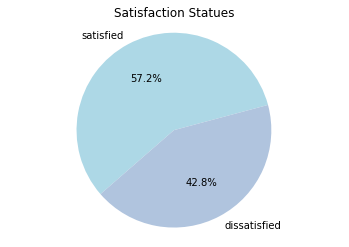

In [20]:
Tasks = [57236,42764]
my_labels = 'satisfied','dissatisfied'
my_colors = ['lightblue','lightsteelblue']

plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = False, colors=my_colors)
plt.title('Satisfaction Statues')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Gender')

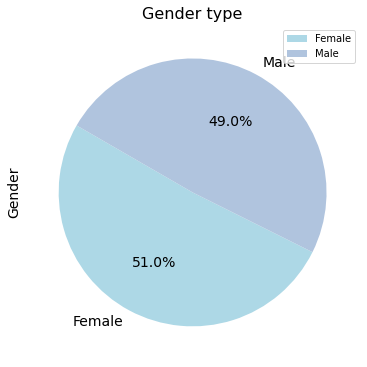

In [136]:
# Plotting our dependent variable, y column
my_colors = ['lightblue','lightsteelblue']
df['Gender'].value_counts().plot(kind='pie', startangle=150, legend=True, figsize=(6,8), fontsize=14 ,autopct='%1.1f%%',colors=my_colors
)

plt.title('Gender type', fontsize=16)
plt.ylabel('Gender', fontsize=14)

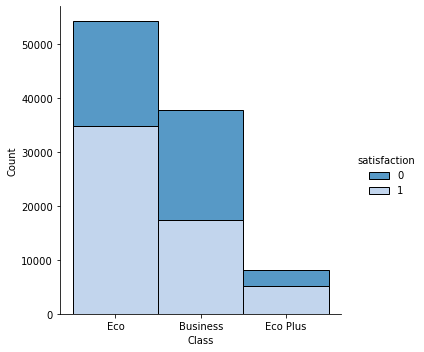

In [142]:
#Are most passengers satisfied, dissatisfied or neutral in general for the airline? 
sns.displot(data=df, x="Class", hue="satisfaction", multiple="stack" ,palette='tab20');

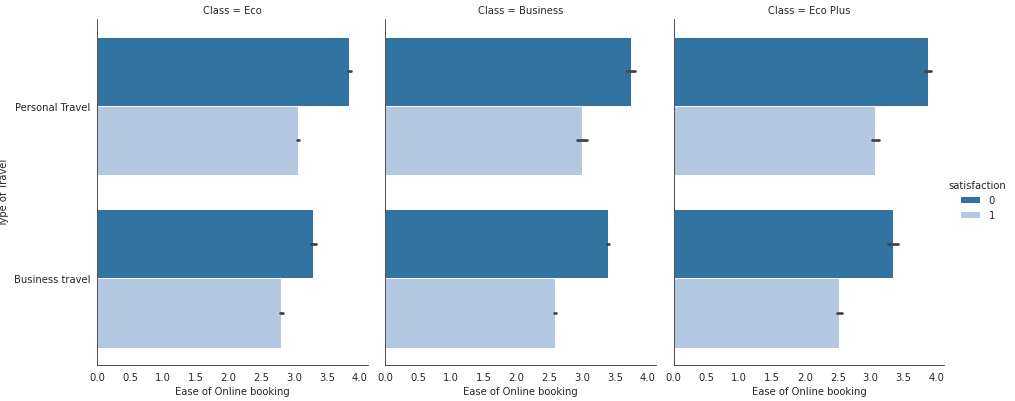

In [138]:
# What type of class was more satisfied passengers?
# depends on type of travle and flight distance

with sns.axes_style('white'):
    g = sns.catplot(x="Ease of Online booking", y="Type of Travel", hue="satisfaction", col="Class", data=df, kind="bar", height=5.5, aspect=.8, palette='tab20')

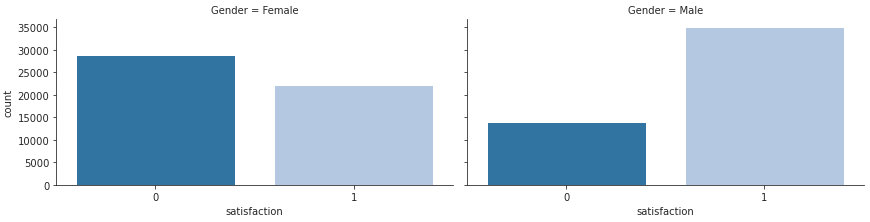

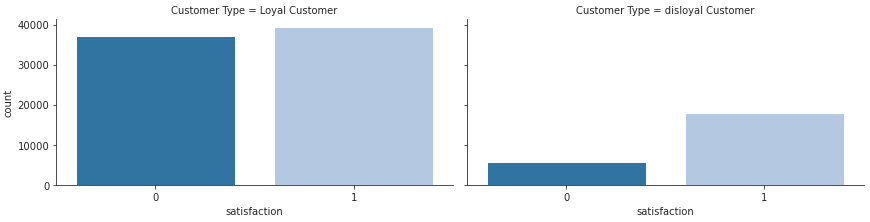

In [139]:
# satisfied passengers were more in wihch class loyal customers or disloyal customers ?
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=3.0, aspect=2.0, palette='tab20');  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=3.0, aspect=2.0, palette='tab20');

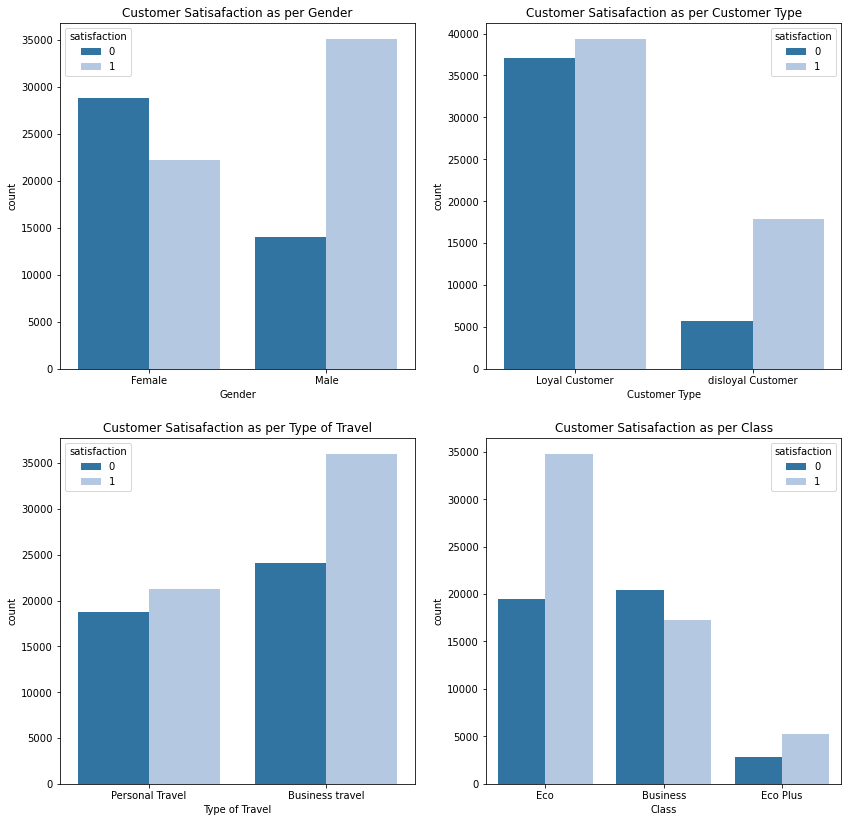

In [143]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2): 
    for j in range(2):
        sns.countplot(data=df,x=cols[c],hue='satisfaction',ax=axs[i][j], palette='tab20')
        axs[i][j].set_title('Customer Satisafaction as per {}'.format(cols[c]))
        c+=1

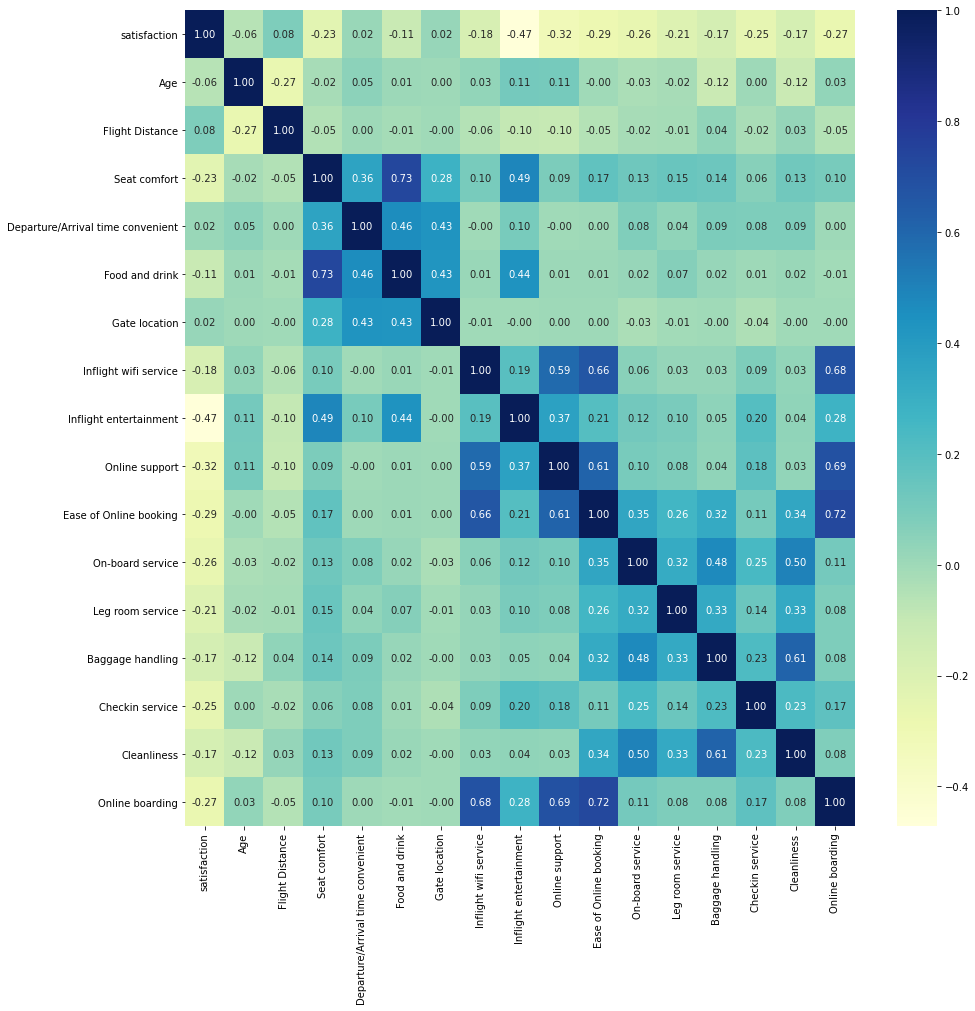

In [141]:
plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='satisfaction'>

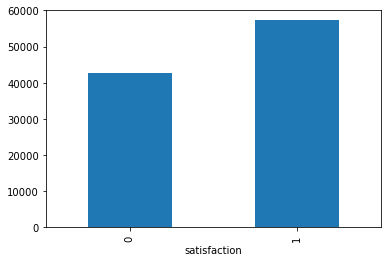

In [27]:
df.pivot_table(index='satisfaction', aggfunc='size').plot(kind='bar')

# Split

In [88]:
X = df.drop("satisfaction", axis = 1) 

y = df ['satisfaction']

In [89]:
num_col = X.select_dtypes(include=np.number).columns
num_col

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness',
       'Online boarding'],
      dtype='object')

In [90]:
#dummy_n = pd.get_dummies(df, drop_first=True)
X = pd.get_dummies(X)
X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Online boarding,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,2,1,0,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,2,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,2,1,0,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,3,1,0,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,5,1,0,1,0,0,1,0,1,0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# LogisticRegression Basline

In [92]:
#With num values

Ir = LogisticRegression()
Ir.fit(X_train[num_col],y_train)
print("LogisticRegression Train: ", Ir.score(X_train[num_col],y_train))
print("LogisticRegression Test: ",Ir.score(X_test[num_col],y_test))

    #Print("---------Test Metrics-----------")
    #model_eval(model,X_test[num_col],y_test)
y_predict = Ir.predict(X_test[num_col])
print("Default threshold :")
print("Precision : {:6.4f}".format(precision_score(y_test,y_predict)))
print("Recall: {:6.4f}",recall_score(y_test,y_predict))

print("Accuracy Score: ", accuracy_score(y_test,y_predict))
print("F-1 Score: ", f1_score(y_test,y_predict))

LogisticRegression Train:  0.738375
LogisticRegression Test:  0.7401
Default threshold :
Precision : 0.7643
Recall: {:6.4f} 0.7873663921499913
Accuracy Score:  0.7401
F-1 Score:  0.7756775418608666


In [93]:
#With all columns

Ir = LogisticRegression()
Ir.fit(X_train,y_train)
print("LogisticRegression Train: ", Ir.score(X_train,y_train))
print("LogisticRegression Test: ", Ir.score(X_test,y_test))

y_predict = Ir.predict(X_test)
print("Default threshold :")
print("Precision : {:6.4f}".format(precision_score(y_test,y_predict)))
print("Recall: {:6.4f}",recall_score(y_test,y_predict))

print("Accuracy Score: ", accuracy_score(y_test,y_predict))
print("F-1 Score: ", f1_score(y_test,y_predict))

LogisticRegression Train:  0.7787875
LogisticRegression Test:  0.77735
Default threshold :
Precision : 0.7984
Recall: {:6.4f} 0.815840196250219
Accuracy Score:  0.77735
F-1 Score:  0.8070373098756336


<AxesSubplot:>

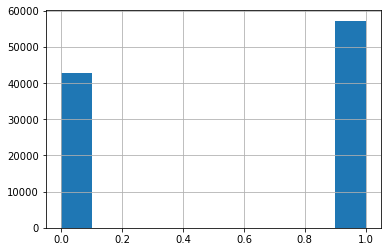

In [94]:
y.hist()

In [95]:
from imblearn.over_sampling import RandomOverSampler 

#exper whith random over sampling
model3 = LogisticRegression(C=1.1000000000003)

# randomly oversample positive samples
ROS = RandomOverSampler(random_state=42)

X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)

model3.fit(X_tr_rs, y_tr_rs)
print("train:",model3.score(X_tr_rs, y_tr_rs))
print("test:",model3.score(X_test, y_test))
#model_eval(model3,X_test,y_test)

y_predict = model3.predict(X_test)
print("Default threshold :")
print("Precision : {:6.4f}".format(precision_score(y_test,y_predict)))
print("Recall: {:6.4f}",recall_score(y_test,y_predict))

print("Accuracy Score: ", accuracy_score(y_test,y_predict))
print("F-1 Score: ", f1_score(y_test,y_predict))

train: 0.7723473440705338
test: 0.76775
Default threshold :
Precision : 0.8240
Recall: {:6.4f} 0.7540739442789557
Accuracy Score:  0.76775
F-1 Score:  0.7875017155405096


In [96]:
from imblearn.over_sampling import SMOTE
#exper whith smot
model4 = LogisticRegression(C=1.1000000000003)

SMT = SMOTE(random_state=42)

X_tr_smt, y_tr_smt = SMT.fit_resample(X_train, y_train)

model4.fit(X_tr_smt, y_tr_smt)
print("train:",model4.score(X_tr_smt, y_tr_smt))
print("test:",model4.score(X_test, y_test))
#model_eval(model3,X_test,y_test)

train: 0.7926978307363275
test: 0.77815


In [97]:
y_predict = model4.predict(X_test)
print("Default threshold :")
print("Precision : {:6.4f}".format(precision_score(y_test,y_predict)))
print("Recall: {:6.4f}",recall_score(y_test,y_predict))

print("Accuracy Score: ", accuracy_score(y_test,y_predict))
print("F-1 Score: ", f1_score(y_test,y_predict))

Default threshold :
Precision : 0.8298
Recall: {:6.4f} 0.7689679341159978
Accuracy Score:  0.77815
F-1 Score:  0.7982356418534855


<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='satisfaction'>

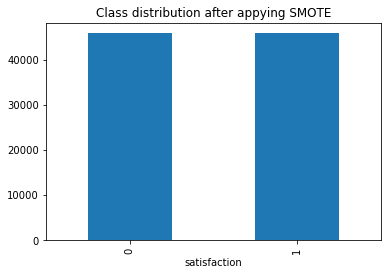

In [98]:
pd.Series(y_tr_smt).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='satisfaction')

<AxesSubplot:>

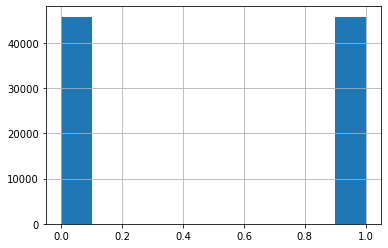

In [99]:
y_tr_smt.hist()

### StandardScaler

In [100]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

#Model
Ir = LogisticRegression()
Ir.fit(X_train_std,y_train)
print("LogisticRegression Std Train: ",Ir.score(X_train_std,y_train))
print("LogisticRegression Std Test: ",Ir.score(X_test_std,y_test))

LogisticRegression Std Train:  0.810875
LogisticRegression Std Test:  0.8085


In [101]:
lr=LogisticRegression()

param = {'penalty':['l1','l2'],"C":np.arange(0.0,100.0,0.5)}

grid = GridSearchCV(lr,param, n_jobs = -1)
grid.fit(X_train_std,y_train) 

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 3...
       60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5,
       66. , 66.5, 67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. ,
       71.5, 72. , 72.5, 73. , 73.5, 74. , 74.5, 75. , 75.5, 76. , 76.5,
       77. , 77.5, 78. , 78.5, 79. , 79.5, 80. , 80.5, 81. , 81.5, 82. ,
       82.5, 83. , 83.5, 84. , 84.5, 85. , 85.5, 86. , 86.5, 87. , 87.5,
       88. , 88.5, 89. , 89.5, 90. , 90.5, 91. , 91.5, 92. , 92.5, 93. ,
       93.5, 94. , 94.5, 95. , 95.5, 96

In [102]:
# examine the best model

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'C': 5.0, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=5.0)
Best score:  0.8102875


In [103]:
#We can get best_estimator in simple way 
#tuned_lr = grid.best_estimator_
#tuned_lr.score(X_test_std, y_test)

In [104]:
lr =LogisticRegression(C= 0.5, penalty = 'l2')
lr.fit(X_train,y_train)
print("LogisticRegression  Train: ",lr.score(X_train_std,y_train))
print("LogisticRegression Test: ",lr.score(X_test_std,y_test))

LogisticRegression  Train:  0.768975
LogisticRegression Test:  0.7665


In [105]:
best_est=grid.best_estimator_

In [106]:
best_est.score(X_train_std,y_train)

0.810875

In [107]:
print("best_estimator Train: ",best_est.score(X_train_std,y_train))
print("best_estimator Test: ",best_est.score(X_test_std,y_test))

best_estimator Train:  0.810875
best_estimator Test:  0.8085


### Predect

In [108]:
y_predict = best_est.predict(X_test_std)
print("Default threshold :")
print("Precision : {:6.4f}".format(precision_score(y_test,y_predict)))
print("Recall: {:6.4f}",recall_score(y_test,y_predict))
print("F-1 Score: ", f1_score(y_test,y_predict))
print("Accuracy Score: ", accuracy_score(y_test,y_predict))
print("ROC Score: ",roc_auc_score(y_test,y_predict))

Default threshold :
Precision : 0.8206
Recall: {:6.4f} 0.8503592079901875
F-1 Score:  0.8352121159969023
Accuracy Score:  0.8085
ROC Score:  0.8016063452017091


# Decision Tree Classifier

In [109]:
decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_train,y_train)
print("Decision Tree Train: ",decisiontree.score(X_train,y_train))
print("Decision Tree Test: ",decisiontree.score(X_test,y_test))

Decision Tree Train:  0.8560625
Decision Tree Test:  0.84755


In [110]:
decisiontree = DecisionTreeClassifier(max_depth=4)
param = {
        'max_depth': [2, 4, 7, 8, 18, 12],
        'min_samples_split' : [1, 5, 8, 9],
        'criterion' : ['gini', 'entropy']
        }
grid = GridSearchCV(decisiontree,param, n_jobs = -1)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 7, 8, 18, 12],
                         'min_samples_split': [1, 5, 8, 9]})

In [111]:
# examine the best model

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 8}
Best estimator:  DecisionTreeClassifier(max_depth=18, min_samples_split=8)
Best score:  0.9288000000000001


In [113]:
decisiontree = DecisionTreeClassifier(max_depth=18, criterion='entropy', min_samples_split=9)
decisiontree.fit(X_train,y_train)

print("Decision Tree Train: ",decisiontree.score(X_train,y_train))
print("Decision Tree Test: ",decisiontree.score(X_test,y_test))

Decision Tree Train:  0.9679
Decision Tree Test:  0.9299


# Predict

In [114]:
y_predict = decisiontree.predict(X_test)
print("Default threshold :")
print("Precision : {:6.4f}".format(precision_score(y_test,y_predict)))
print("Recall: {:6.4f}",recall_score(y_test,y_predict))
print("F-1 Score: ", f1_score(y_test,y_predict))
print("Accuracy Score: ", accuracy_score(y_test,y_predict))
print("ROC Score: ",roc_auc_score(y_test,y_predict))

Default threshold :
Precision : 0.9377
Recall: {:6.4f} 0.9395479236025933
F-1 Score:  0.9386433260393873
Accuracy Score:  0.9299
ROC Score:  0.9283111153070036


# RandomForest Classifier

In [115]:
import time
start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {    'n_estimators' : [20, 50, 10, 80,70],
                            'max_depth' : [3, 4, 8, 6, 15, 11],
                            'criterion' : ['gini', 'entropy'],
                            'min_samples_split' : [4, 7, 3, 9],
                            'max_features':['auto', 'sqrt', 'log2']}

from sklearn.model_selection import RandomizedSearchCV

randomforest = RandomForestClassifier(n_estimators = 100)

rs = RandomizedSearchCV(randomforest, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 8, 6, 15, 11],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 7, 3, 9],
                                        'n_estimators': [20, 50, 10, 80, 70]},
                   random_state=0, return_train_score=True, scoring='accuracy')

In [116]:
print("RandomForest Train: ",rs.score(X_train,y_train))
print("RandomForest Test: ",rs.score(X_test,y_test))

print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",rs.best_score_)

rs.fit(X_train, y_train)

y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

RandomForest Train:  0.9676625
RandomForest Test:  0.94525
Optimal hyperparameter combination: {'n_estimators': 50, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy'}

Mean cross-validated training accuracy score: 0.9459


In [117]:
y_pred = rs.best_estimator_.predict(X_test)
print("Default threshold :")
print("Precision : {:6.4f}".format(precision_score(y_test,y_predict)))
print("Recall: {:6.4f}",recall_score(y_test,y_predict))
print("F-1 Score: ", f1_score(y_test,y_predict))
print("Accuracy Score: ", accuracy_score(y_test,y_predict))
print("ROC Score: ",roc_auc_score(y_test,y_predict))

Default threshold :
Precision : 0.9377
Recall: {:6.4f} 0.9395479236025933
F-1 Score:  0.9386433260393873
Accuracy Score:  0.9299
ROC Score:  0.9283111153070036


# XGBClassifier

In [118]:
import time
start = time.time()
from xgboost import XGBClassifier
import xgboost as xgb
# Defining 3-dimensional hyperparameter space as a Python dictionary

In [119]:
gbm = xgb.XGBClassifier(
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05,
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )
eval_set=[(X_train, y_train),(X_test,y_test)]
fit_model = gbm.fit(
                    X_train, y_train,
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))

print(f"Train score: {gbm.score(X_train, y_train)}")
print(f"Test score: {gbm.score(X_test, y_test)}")

model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

Train score: 0.952875
Test score: 0.9481


In [62]:
y_predict = gbm.predict(X_test)
print("Default threshold :")
print("Precision : {:6.4f}".format(precision_score(y_test,y_predict)))
print("Recall: {:6.4f}",recall_score(y_test,y_predict))
print("Accuracy Score: ", accuracy_score(y_test,y_predict))
print("F-1 Score: ", f1_score(y_test,y_predict))

Default threshold :
Precision : 0.9465
Recall: {:6.4f} 0.9635535307517085
Accuracy Score:  0.9481
F-1 Score:  0.9549361812972128


# collect all models in a list

In [120]:
model_names = ["best_est", "decisiontree", "rs","gbm" ]
#, "xg"

In [121]:
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [122]:
print(f' Logreg Test score: {best_est.score(X_test_std, y_test)}')
print(f' Random forest Test score: {rs.score(X_test, y_test)}')
print(f' decisiontree Test score: {decisiontree.score(X_test, y_test)}')
print(f' XGBClassifier Test score: {gbm.score(X_test, y_test)}')

 Logreg Test score: 0.8085
 Random forest Test score: 0.9467
 decisiontree Test score: 0.9299
 XGBClassifier Test score: 0.9481


# voting

In [123]:
# create voting classifier
from sklearn.ensemble import VotingClassifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('best_est', LogisticRegression(C=5.0)),
                             ('decisiontree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=18,
                                                     min_samples_split=9)),
                             ('rs',
                              RandomizedSearchCV(cv=10,
                                                 estimator=RandomForestClassifier(),
                                                 n_jobs=-1,
                                                 param_distributions={'criterion': ['gini',
                                                                                    'entropy'],
                                                                      'max_depth': [3,
                                                                                    4,
                                                                    

In [124]:
# Get accuracy (model to beat: logreg with 0.8324 accuracy)

y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)


0.9453

# Stacking Classifier

In [125]:
from mlxtend.classifier import StackingClassifier
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

stacked.fit(X_train, y_train)


[23:36:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(classifiers=[LogisticRegression(C=5.0),
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=18,
                                                       min_samples_split=9),
                                RandomizedSearchCV(cv=10,
                                                   estimator=RandomForestClassifier(),
                                                   n_jobs=-1,
                                                   param_distributions={'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': [3,
                                                                                      4,
                                                                                      8,
                                                     

In [126]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)

0.94635

# The ROC curve

In [127]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

In [128]:
len(thresholds)

2197

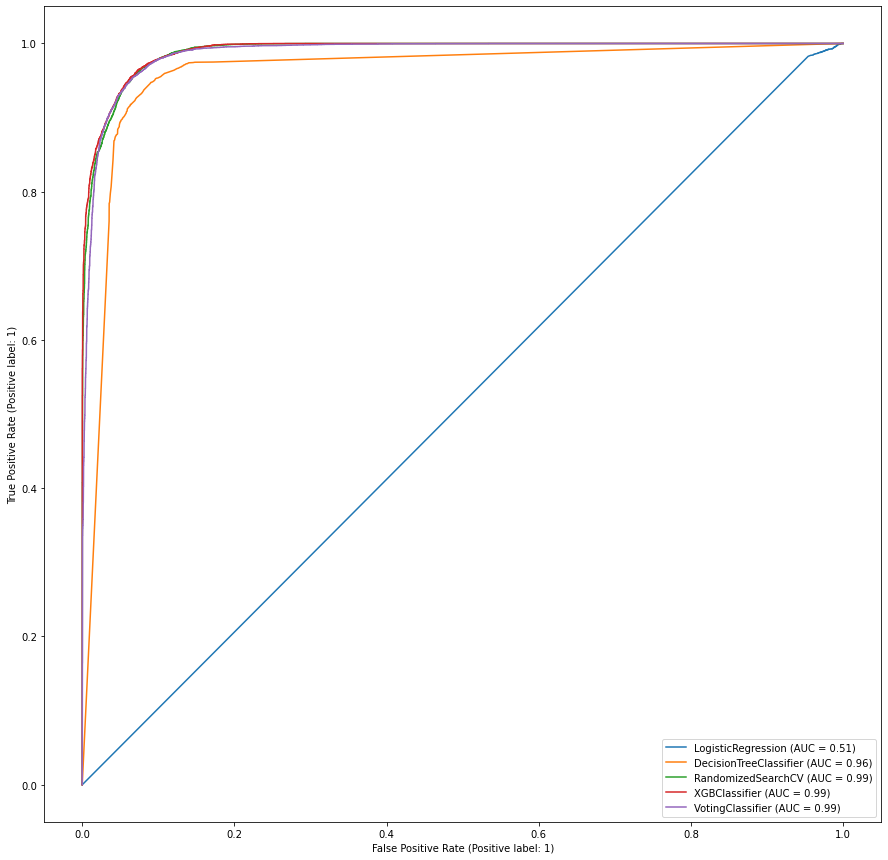

In [129]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(15,15)) 
classifierss =[best_est, decisiontree, rs,gbm,voting_classifer]
ax = plt.gca()
for i in classifierss:
    plot_roc_curve(i, X_test, y_test, ax=ax)
 


ROC AUC score =  0.9902640344951342
Threshold value is: 0.49610242


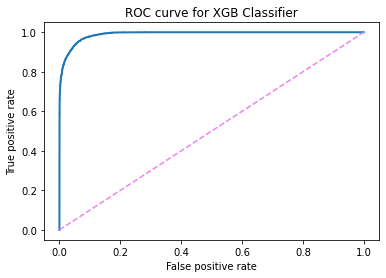

In [130]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt  

fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1]) 

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for XGB Classifier');
print("ROC AUC score = ", roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plt.savefig("satisfaction.png")


# confusion_matrix

In [131]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (rs.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Satisfied', 'Dissatisfied'],
           yticklabels=['Satisfied', 'Dissatisfied']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

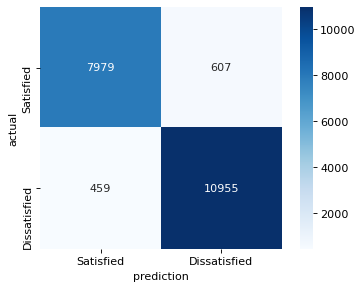

In [132]:
make_confusion_matrix(rs)

In [134]:
from functools import reduce

def _get_model_name(model):
    """
            Returns a string with the name of a sklearn model
                model: Sklearn stimator class
    """
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
        name = "Pipeline_" + str(estimator)[:str(estimator).find("(")]
    else: 
        name = str(model)[:str(model).find("(")]
    return name
    
    
def plot_cv_score(X, y, models_list, cv = 5, scoring_list = None, refit = True, return_scores = False):
    """ 
            X: numpy_array/pandas dataframe n_rows, m_features
            y: numpy_array/pandas dataframe n_rows
            Plots min, max and avg kfold crosval_score for a list of models
        
    """
    
        
        
    names, mean_score = list(), list()
    ldf = list()
    mnames = list()
    
    for i, model in enumerate(models_list):
        name = _get_model_name(model)
    
        if refit:
            model.fit(X, y)
                
        for metric in score_list:
            
            score = cross_val_score(model, X, y, cv = cv, scoring = metric, n_jobs= -1)
            mean_score.append(np.mean(score))
    
    
        tmp = pd.DataFrame({name: mean_score}, index = score_list)
        
            
            
        ldf.append(tmp)
        
        
        mean_score = list()
        
    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), ldf).T
        
    
    
    fig, ax  = plt.subplots(1,1, figsize = (10,5))

    frame_scores.plot.bar(ax = ax, cmap = 'RdYlBu', edgecolor = "black")
    ax.legend(loc = 'best')
    ax.set_xlabel("Score")
    ax.set_title("Evaluation model")

    if return_scores:    
        return frame_scores

[00:06:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


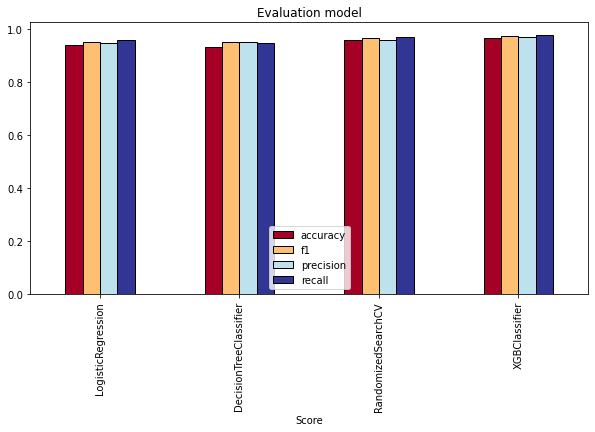

In [135]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

X, y = load_breast_cancer(return_X_y= True)

models_list =[best_est, decisiontree, rs,gbm ]

score_list = [ "accuracy", "f1", "precision", "recall"]

t = plot_cv_score(X = X, y = y, models_list = models_list, cv = 5, scoring_list = score_list, refit = True)
